## Make forge data

In [38]:
#imports
import mglearn, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
print (X[:5], y[:5])

## split the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## KNN algo
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

## Prediction results
print ("Test set predictions : {}".format(clf.predict(X_test)))
print ("Test accuracy : {:.2f}".format(clf.score(X_test, y_test)))

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]] [1 0 1 0 0]
Test set predictions : [1 0 1 0 1 0 0]
Test accuracy : 0.86


E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


## Graphs

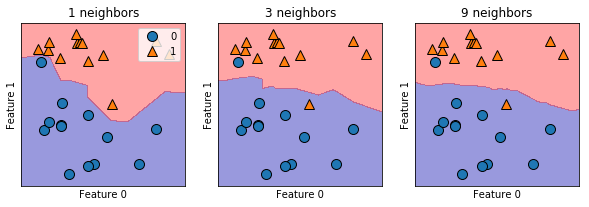

In [2]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, 
                                    fill=True, eps = 0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=1)
plt.show()

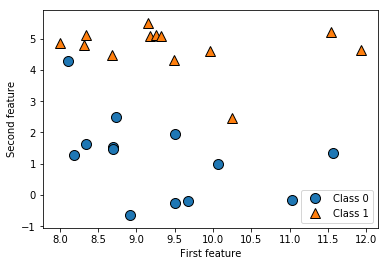

In [3]:
#plot the data
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## Make wave dataset

Text(0, 0.5, 'Target')

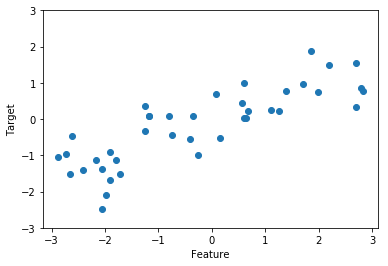

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

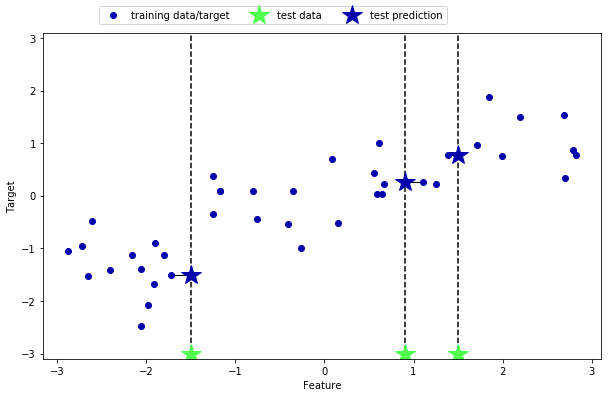

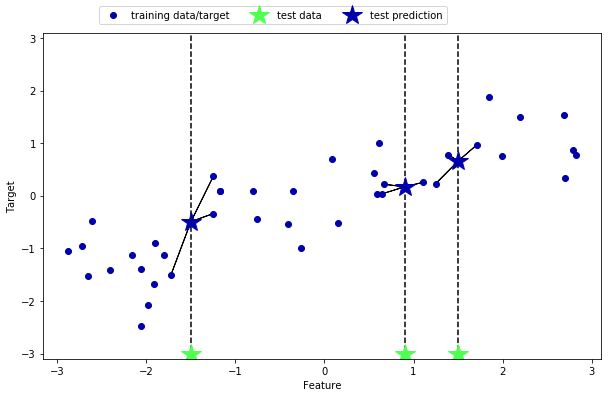

In [5]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## instantiate the class
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print ("Test prediction : {}".format(reg.predict(X_test)))

## R^2 form
print ("Test set R^2:{:.3f}".format(reg.score(X_test, y_test)))


Test prediction : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2:0.834


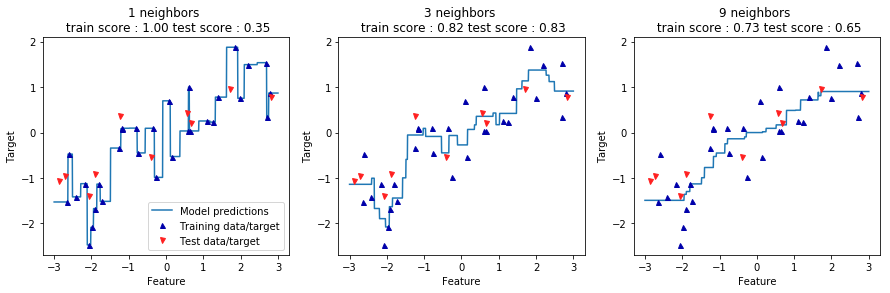

In [7]:
## KNeighborsRegressor algo for 1,3 and 9 samples
fig, axes = plt.subplots(1, 3, figsize = (15,4))
line = np.linspace(-3,3,1000).reshape(-1, 1)
for i, ax in zip([1, 3, 9], axes):
    ## making predictions for i times samples
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=5)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=5)
    
    ## setting titles
    ax.set_title(
        "{} neighbors \n train score : {:.2f} test score : {:.2f}".format(
            i, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

## setting legends
axes[0].legend(["Model predictions", "Training data/target",
                  "Test data/target"], loc='best')
plt.show()

w[0]: 0.393906  b: -0.031804


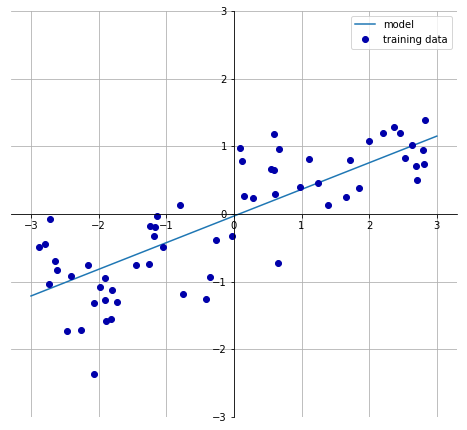

In [8]:
mglearn.plots.plot_linear_regression_wave()

In [12]:
## imports and definitions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
#y = np.reshape(y, (60,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## curve fit
lr = LinearRegression()
lr.fit(X_train, y_train)

## coef_
print ("lr.coef_: {}".format(lr.coef_))
print ("lr.intercept_: {}".format(lr.intercept_))
print ("Training set score : {:.2f}".format(lr.score(X_train, y_train)))
print ("Test set score : {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973
Training set score : 0.67
Test set score : 0.66


## Breast cancer dataset

In [13]:
## Breast cancer data
import numpy as np
from sklearn.datasets import load_breast_cancer

## assigning cancer dataset and getting the parameters
cancer = load_breast_cancer()
print ("Keys : {}".format(cancer.keys()))
print ("Shape : {}".format(cancer.data.shape))
print ("Sample counts :\n{}".format({n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print ("Feature names : \n{}".format(cancer.feature_names[:10]))
print ("DESCR : \n{}".format(cancer.DESCR[:100]))

Keys : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape : (569, 30)
Sample counts :
{'malignant': 212, 'benign': 357}
Feature names : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']
DESCR : 
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
---------------------------


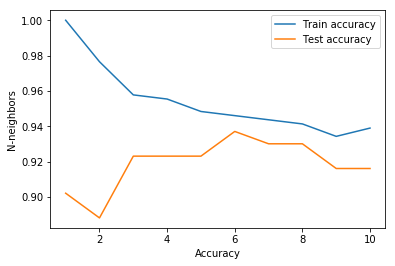

In [14]:
## split the test and train data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
train_accuracy = []
test_accuracy = []

## assign different neighbors to try out
neighbors_settings = range(1,11)
for i in neighbors_settings:

    ## build the model for ith neighbor
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)

    ## Record training and test accuracies
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
## plot the graphs
plt.show()
plt.plot(neighbors_settings, train_accuracy, label = 'Train accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test accuracy')
plt.xlabel("Accuracy")
plt.ylabel("N-neighbors")
plt.legend()

## Breast cancer - Logistic Regression

Training set score : 0.953
Test data set scroe : 0.958
Training set score : 0.972
Test set score : 0.965
Training set score : 0.934
Test set score : 0.930


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


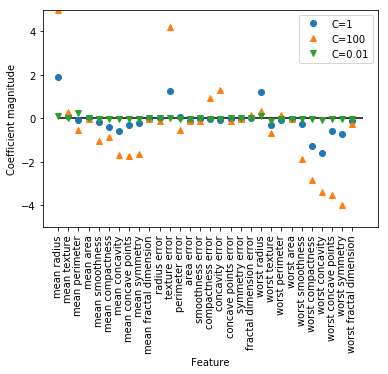

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                    random_state=42)
## C = 1; default value
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print ("Training set score : {:.3f}".format(logreg.score(X_train, y_train)))
print ("Test data set scroe : {:.3f}".format(logreg.score(X_test, y_test)))

## C = 100
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)
print ("Training set score : {:.3f}".format(logreg100.score(X_train, y_train)))
print ("Test set score : {:.3f}".format(logreg100.score(X_test, y_test)))

## C = 0.01
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)
print ("Training set score : {:.3f}".format(logreg001.score(X_train, y_train)))
print ("Test set score : {:.3f}".format(logreg001.score(X_test, y_test)))

## coefficients curve
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

## L1 regularization on the above breast cancer dataset by Logistic Regression

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Testing accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Testing accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Testing accuracy of l1 logreg with C=100.000: 0.98


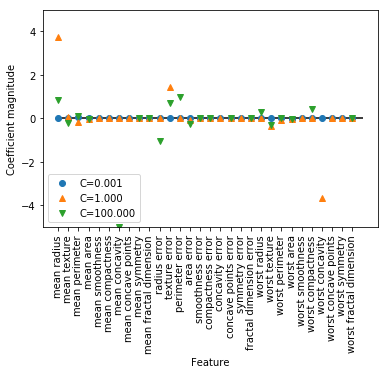

In [16]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_li = LogisticRegression(C=C, penalty = "l1")
    lr_li.fit(X_train, y_train)
    print ("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            C, lr_li.score(X_train, y_train)))
    print ("Testing accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            C, lr_li.score(X_test, y_test)))
    plt.plot(lr_li.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
    

## Boston dataset

In [17]:
## boston data set
from sklearn.datasets import load_boston
boston = load_boston()
print ("Data shape : {}".format(boston.data.shape))
print ("Boston features : {}".format(boston.keys()))
print ("Boston data : {}".format(boston.data[:2]))
print ("Boston target : {}".format(boston.target[:3]))
print ("Boston feature : {}".format(boston.feature_names))

Data shape : (506, 13)
Boston features : dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Boston data : [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]
Boston target : [24.  21.6 34.7]
Boston feature : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Extended boston dataset

X.shape :(506, 104)


E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


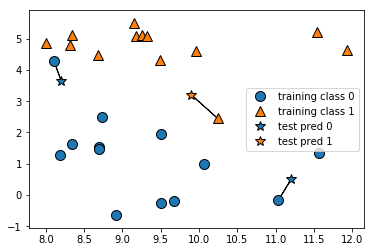

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Linear Regression model
Training set accuracy : 0.95
Test set accuracy : 0.61
Ridge model
Train accuracy : 0.89
Test accuracy : 0.75
Ridge with 10 alpha
Train accuracy : 0.79
Test accuracy : 0.64
Ridge with 0.1 alpha
Train accuracy : 0.93
Test accuracy : 0.77


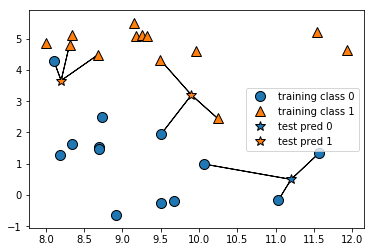

In [34]:
## imports 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## sample plots for 1 and 3 neighbors
X, y = mglearn.datasets.load_extended_boston()
print ("X.shape :{}".format(X.shape))
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_classification(n_neighbors=3)

## split the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Linear regression algo
lr = LinearRegression()
lr.fit(X_train, y_train)
print ("Linear Regression model\nTraining set accuracy : {:.2f}".format(lr.score(X_train, y_train)))
print ("Test set accuracy : {:.2f}".format(lr.score(X_test, y_test)))

## Ridge regression algo as the linear regression model is overfitted
ridge = Ridge()
ridge.fit(X_train, y_train)
print ("Ridge model\nTrain accuracy : {:.2f}".format(ridge.score(X_train, y_train)))
print ("Test accuracy : {:.2f}".format(ridge.score(X_test, y_test)))

## Ridge with 10 as alpha
ridge10 = Ridge(alpha = 10)
ridge10.fit(X_train, y_train)
print ("Ridge with 10 alpha\nTrain accuracy : {:.2f}".format(ridge10.score(X_train, y_train)))
print ("Test accuracy : {:.2f}".format(ridge10.score(X_test, y_test)))

## Ridge with 0.1 alpha
ridge01 = Ridge(alpha = 0.1)
ridge01.fit(X_train, y_train)
print ("Ridge with 0.1 alpha\nTrain accuracy : {:.2f}".format(ridge01.score(X_train, y_train)))
print ("Test accuracy : {:.2f}".format(ridge01.score(X_test, y_test)))

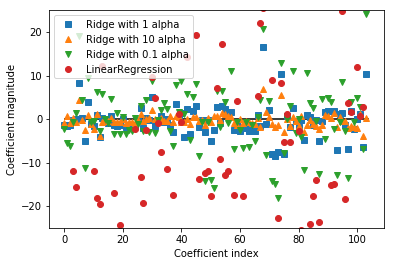

In [19]:
## plotting coef_ and alpha correlation
plt.plot(ridge.coef_, 's', label = 'Ridge with 1 alpha')
plt.plot(ridge10.coef_, '^', label = 'Ridge with 10 alpha')
plt.plot(ridge01.coef_, 'v', label = 'Ridge with 0.1 alpha')

## labels
plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()

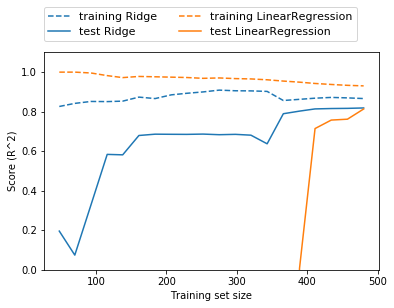

In [20]:
mglearn.plots.plot_ridge_n_samples()

Lasso (1) 
Train accuracy : 0.29
Test accuracy : 0.21
No of features : 4
Lasso (0.01) 
Train accuracy : 0.90
Test accuracy : 0.77
No of features : 33
Lasso (0.0001) 
Train accuracy : 0.95
Test accuracy : 0.64
No of features : 96


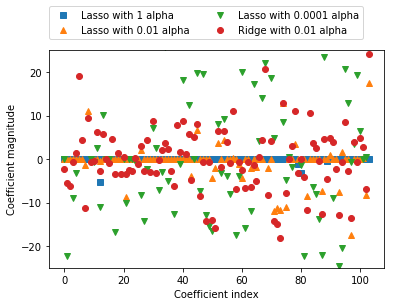

In [21]:
## lasso fits
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso()
lasso.fit(X_train, y_train)
print ("Lasso (1) \nTrain accuracy : {:.2f}".format(lasso.score(X_train, y_train)))
print ("Test accuracy : {:.2f}".format(lasso.score(X_test, y_test)))
print ("No of features : {}".format(np.sum(lasso.coef_ != 0)))

## lasso with 0.01 alpha
lasso001 = Lasso(alpha=0.01, max_iter=100000)
lasso001.fit(X_train, y_train)
print ("Lasso (0.01) \nTrain accuracy : {:.2f}".format(lasso001.score(X_train, y_train)))
print ("Test accuracy : {:.2f}".format(lasso001.score(X_test, y_test)))
print ("No of features : {}".format(np.sum(lasso001.coef_ != 0)))

## lasso with 0.0001 alpha
lasso00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso00001.fit(X_train, y_train)
print ("Lasso (0.0001) \nTrain accuracy : {:.2f}".format(lasso00001.score(X_train, y_train)))
print ("Test accuracy : {:.2f}".format(lasso00001.score(X_test, y_test)))
print ("No of features : {}".format(np.sum(lasso00001.coef_ != 0)))

## Comparisons of different lasso (1,0.01, 0.0001) v Ridge (0.01)
plt.plot(lasso.coef_,'s', label = 'Lasso with 1 alpha')
plt.plot(lasso001.coef_,'^', label = 'Lasso with 0.01 alpha')
plt.plot(lasso00001.coef_,'v', label = 'Lasso with 0.0001 alpha')
plt.plot(ridge01.coef_,'o', label = 'Ridge with 0.01 alpha')

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

## Test and train data

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


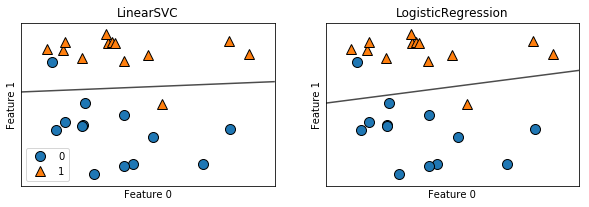

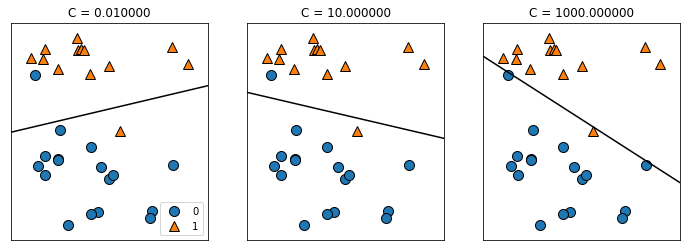

In [22]:
## imports and data
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
flag, axes = plt.subplots(1, 2, figsize = (10,3))

## Iteration for different values
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

## mglearn plot
mglearn.plots.plot_linear_svc_regularization()

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


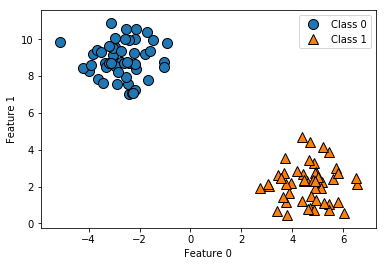

In [23]:
from mglearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

## Linear SVC

In [24]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(X, y)
print ("Coefficient shape : {}".format(linear_svm.coef_.shape))
print ("Intercept shape : {}".format(linear_svm.intercept_.shape))

Coefficient shape : (1, 2)
Intercept shape : (1,)


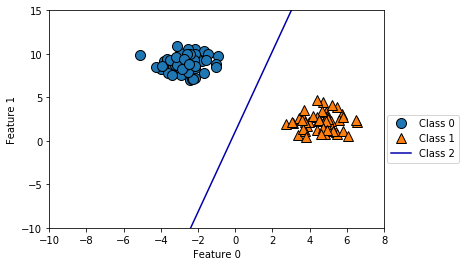

In [25]:
## visualize
import numpy as np
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],
          loc=(1.01, 0.3))

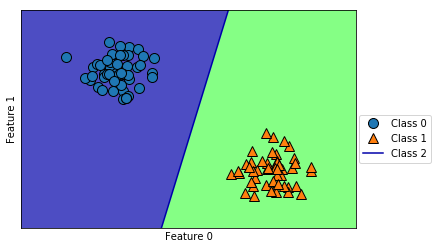

In [26]:
## another visualization
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],
          loc=(1.01, 0.3))

## Method chaining

In [40]:
## instantiating models and fitting in one line
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

## split the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg=LogisticRegression().fit(X_train, y_train)
print (logreg)

##fitting and predicting in one line
logreg=LogisticRegression()
y_pred=logreg.fit(X_train, y_train).predict(X_test)
print (y_pred)

## all the above in one line
y_pred=LogisticRegression().fit(X_train, y_train).predict(X_test)
print (y_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[1 0 1 0 1 0 0]
[1 0 1 0 1 0 0]


E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
